# DAI: Download Historical Data from Compound API

In [13]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys

In [14]:
pathAPI = os.getcwd()
pathData = os.path.join(pathAPI,'data')

In [15]:
# API URL Compound, https://compound.finance/docs/api#MarketHistoryService
urlcomp = 'https://api.compound.finance/api/v2/market_history/graph'

In [16]:
#Assets
cETH='0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5'
cSAI='0xf5dce57282a584d2746faf1593d3121fcac444dc'
cDAI='0x5d3a536e4d6dbd6114cc1ead35777bab948e3643'
cUSDC='0x39aa39c021dfbae8fac545936693ac917d5e7563'

In [17]:
#Time Frame
startT='19-10-01 00:00:00'
endT='21-03-27 00:00:00'
startT=datetime.strptime(startT, '%y-%m-%d %H:%M:%S')
endT=datetime.strptime(endT, '%y-%m-%d %H:%M:%S')

In [18]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

In [19]:
print(UstartT)
print(UendT)

1569906000.0
1616821200.0


In [20]:
#Frequency Dayly data
freqD=abs((endT - startT).days)

In [21]:
params = {"asset": cDAI,
 "min_block_timestamp": 1569906000,
 "max_block_timestamp": 1616821200,
 "num_buckets": freqD}

In [22]:
#response = requests.get(urlcomp,params)
#cethHD = response.json()

In [23]:
#Save Data
#f = open(os.path.join(pathData,'cDAI_daily.pickle'), 'wb')
#pickle.dump(cethHD, f,-1)          
#f.close()    

In [36]:
#Load Downloaded Data
f = open(os.path.join(pathData,'cDAI_daily.pickle'), 'rb')
cethHD = pickle.load(f)     
f.close() 

In [46]:
#Retrive data
BR=json_normalize(cethHD['borrow_rates'],sep="_")
BR['rate'] = BR['rate'].astype(float)
BR.index=pd.to_datetime(BR['block_timestamp'], unit='s')
BR=BR.rate
SR=json_normalize(cethHD['supply_rates'],sep="_")
SR['rate'] = SR['rate'].astype(float)
SR.index=pd.to_datetime(SR['block_timestamp'], unit='s')
SR=SR.rate
TS=json_normalize(cethHD['total_supply_history'],sep="_")
TS['total_value'] = TS['total_value'].astype(float)
TS.index=pd.to_datetime(TS['block_timestamp'], unit='s')
TS=TS.total_value
TB=json_normalize(cethHD['total_borrows_history'],sep="_")
TB['total_value'] = TB['total_value'].astype(float)
TB.index=pd.to_datetime(TB['block_timestamp'], unit='s')
TB=TB.total_value
Xrate=json_normalize(cethHD['exchange_rates'],sep="_")
Xrate['rate'] = Xrate['rate'].astype(float)
Xrate.index=pd.to_datetime(Xrate['block_timestamp'], unit='s')
Xrate=Xrate.rate
PUSD=json_normalize(cethHD['prices_usd'],sep="_")
PUSD['price_value'] = PUSD['price_value'].astype(float)
PUSD.index=pd.to_datetime(PUSD['block_timestamp'], unit='s')
PUSD=PUSD.price_value
Uta=pd.Series((SR.values/(BR.values*(1-0.15))),index=BR.index) #Reserve Factor 15%

In [48]:
Uta.describe()

count    478.000000
mean       0.879244
std        0.174581
min        0.000000
25%        0.820962
50%        0.871870
75%        1.010425
max        1.123637
dtype: float64

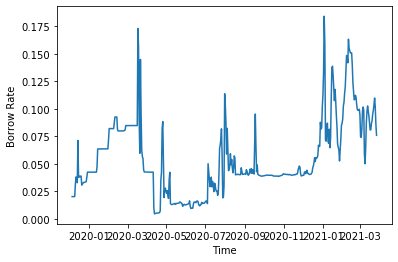

In [49]:
plt.plot(BR)
plt.xlabel('Time')
plt.ylabel('Borrow Rate')
plt.show()

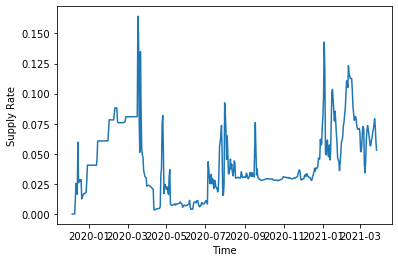

In [50]:
plt.plot(SR)
plt.xlabel('Time')
plt.ylabel('Supply Rate')
plt.show()

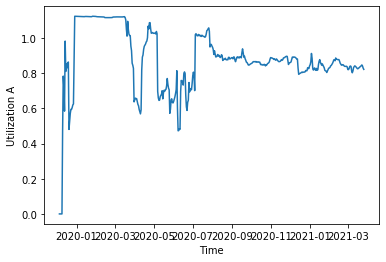

In [51]:
plt.plot(SR.index, Uta)
plt.xlabel('Time')
plt.ylabel('Utilization A')
plt.show()

In [44]:
Uta.tail()

block_timestamp
2021-03-22 04:59:49    0.842270
2021-03-23 04:59:49    0.846851
2021-03-24 04:59:49    0.840914
2021-03-25 04:59:49    0.828974
2021-03-26 04:59:49    0.821677
dtype: float64

In [45]:
BR.tail()

block_timestamp
2021-03-22 04:59:49    0.103676
2021-03-23 04:59:49    0.109924
2021-03-24 04:59:49    0.101744
2021-03-25 04:59:49    0.085890
2021-03-26 04:59:49    0.075933
Name: rate, dtype: float64

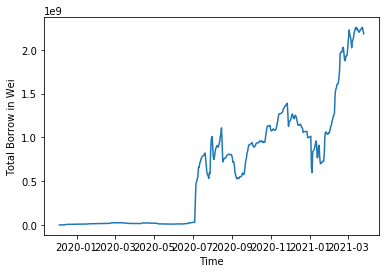

In [52]:
plt.plot(TB)
plt.xlabel('Time')
plt.ylabel('Total Borrow in Wei')
plt.show()

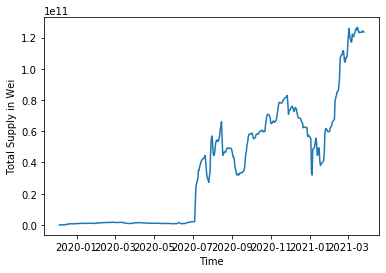

In [53]:
plt.plot(TS)
plt.xlabel('Time')
plt.ylabel('Total Supply in Wei')
plt.show()

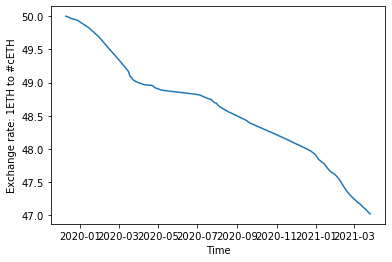

In [54]:
plt.plot(1/Xrate)
plt.xlabel('Time')
plt.ylabel('Exchange rate: 1ETH to #cETH')
plt.show()

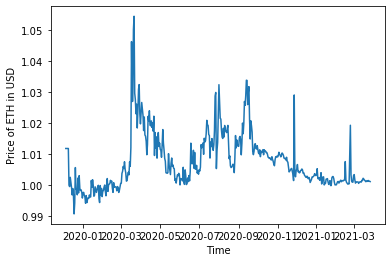

In [55]:
plt.plot(PUSD)
plt.xlabel('Time')
plt.ylabel('Price of ETH in USD')
plt.show()